In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Johan/Dropbox (Institut für Statistik)/Structural Breaks + DL/Figures/'
#path = 'C:/Users/Meier/Dropbox (Institut für Statistik)/Structural Breaks + DL/Figures/'

In [3]:
obs_total = 2500*0.9*0.9     # no. of training obs.

In [4]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### No batch weights

In [88]:
alpha_lin = 0.5
alpha_exp = 0.001
alpha_Ray = 3*10**(-6)
alpha_pow = 0.2

In [90]:
step = 0
weights_lin = []
weights_exp = []
weights_Ray = []
weights_pow = []
for i in range(int(obs_total)):
    step += 1 # mean period of batch
    weights_lin.append(alpha_lin*(step/obs_total)) # linear weight
    weights_exp.append(np.exp(-alpha_exp*(obs_total-step)))  # exponential weight
    #weights_Ray.append(np.exp(-((obs_total-step)**2)/(2*alpha_Ray))) # Rayleigh weights
    #weights_Ray.append(1-np.exp(-((step-1)**2)/(2*alpha_Ray))) # Rayleigh weights
    weights_Ray.append(np.exp(-(1/2)*alpha_Ray*(obs_total-step)**2)) # Rayleigh weights
    weights_pow.append(1/(obs_total-step+1)**alpha_pow)  # power law weight

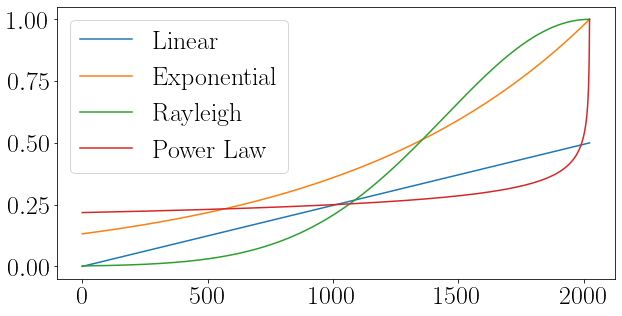

In [91]:
plt.figure(figsize=(10,5))
plt.plot(weights_lin, label='Linear')
plt.plot(weights_exp, label='Exponential')
plt.plot(weights_Ray, label='Rayleigh')
plt.plot(weights_pow, label='Power Law')
plt.legend()
plt.show()

### Plot one batch size

In [38]:
batch_size = 64
batch_no = int(obs_total//batch_size)
alpha = 0.999

In [39]:
step = 1
mean_t = 0
batch_weights = []
batch_weights_lin = []
batch_weights_exp = []
batch_weights_Ray = []
batch_weights_pow = []
for i in range(batch_no):
    mean_t = np.mean(np.arange(step,step+batch_size+1)) # mean period of batch
    #batch_weights.append(alpha**(obs_total-mean_t))  # batch weight
    batch_weights_lin.append(alpha_lin*(mean_t/obs_total)) # linear weight
    batch_weights_exp.append(np.exp(-alpha_exp*(obs_total-mean_t)))  # exponential weight
    batch_weights_Ray.append(np.exp(-(1/2)*alpha_Ray*(obs_total-mean_t)**2)) # Rayleigh weights
    batch_weights_pow.append(1/(obs_total-mean_t+1)**alpha_pow)  # power law weight
    step += batch_size

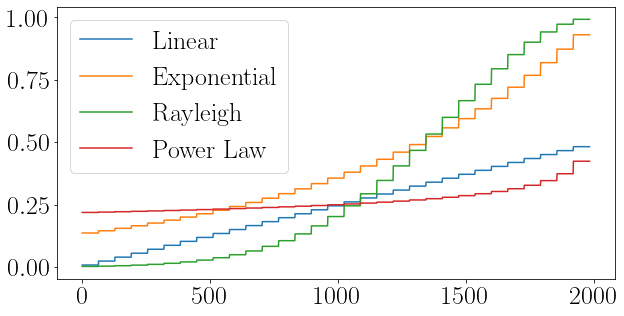

In [40]:
plt.figure(figsize=(10,5))
#plt.plot(np.repeat(batch_weights,batch_size))
plt.plot(np.repeat(batch_weights_lin,batch_size), label='Linear')
plt.plot(np.repeat(batch_weights_exp,batch_size), label='Exponential')
plt.plot(np.repeat(batch_weights_Ray,batch_size), label='Rayleigh')
plt.plot(np.repeat(batch_weights_pow,batch_size), label='Power Law')
plt.legend()
plt.show()

### Plot multiple batch sizes

In [ ]:
cmap = plt.get_cmap("tab20c")

Linear weights:

In [138]:
batch_size = np.array([1,32,128])
alpha = np.array([0.5, 1, 1.5])

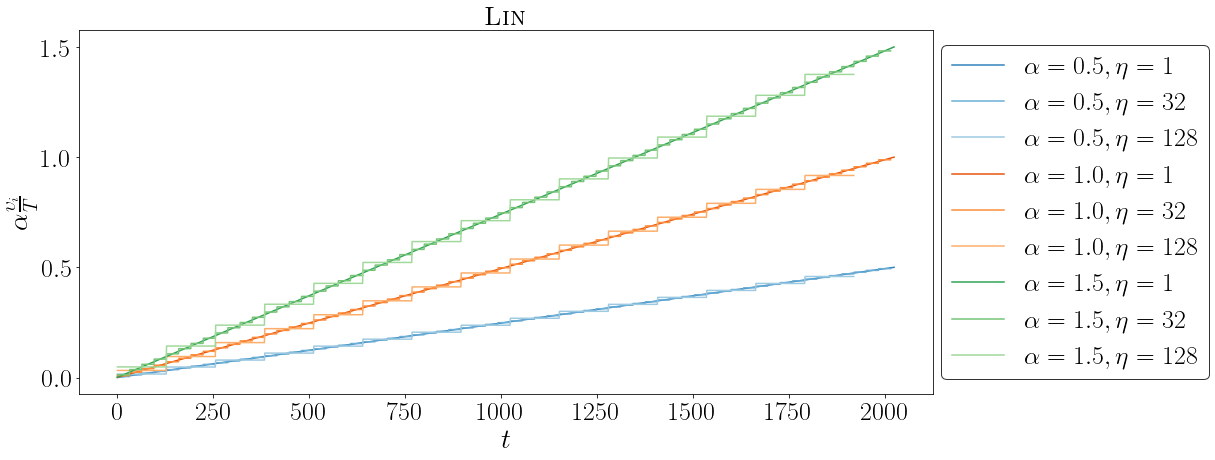

In [139]:
plt.figure(figsize=(17,6.5))
add = 0
for k in range(alpha.shape[0]):
    for j in range(batch_size.shape[0]):
        batch_no = int(obs_total//batch_size[j])
        step = 1
        mean_t = 0
        batch_weights = []
        for i in range(batch_no):
            mean_t = np.mean(np.arange(step,step+batch_size[j]+1)) # mean period of batch
            batch_weights.append(alpha[k]*(mean_t/obs_total)) # linear batch weight
            step += batch_size[j]
        plt.plot(np.repeat(batch_weights,batch_size[j]),label=r'$\alpha=%s, \eta=%s$' % (alpha[k],batch_size[j]), color=cmap(j+add), linestyle='-')
    add += 4
plt.xlabel(r'$t$')
plt.ylabel(r'$\alpha\frac{\upsilon_i}{T}$')
plt.title(r'\textsc{Lin}')
plt.legend(loc=(1.01, 0.04),edgecolor ='black')
plt.tight_layout()
plt.savefig(path+'LINlossweights.pdf', bbox_inches='tight')
plt.show()

Exponential weights:

In [140]:
batch_size = np.array([1,32,128])
alpha = np.array([0.0005, 0.001, 0.005])

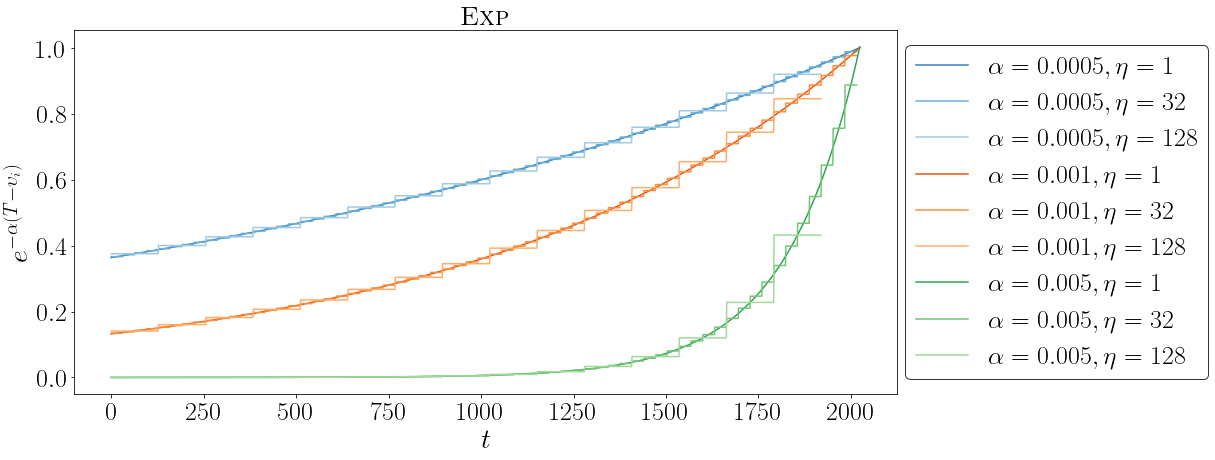

In [141]:
plt.figure(figsize=(17,6.5))
add = 0
for k in range(alpha.shape[0]):
    for j in range(batch_size.shape[0]):
        batch_no = int(obs_total//batch_size[j])
        step = 1
        mean_t = 0
        batch_weights = []
        for i in range(batch_no):
            mean_t = np.mean(np.arange(step,step+batch_size[j]+1)) # mean period of batch
            #batch_weights.append(alpha[k]**(obs_total-mean_t))  # exponential batch weight
            batch_weights.append(np.exp(-alpha[k]*(obs_total-mean_t))) # exponential batch weight
            step += batch_size[j]
        plt.plot(np.repeat(batch_weights,batch_size[j]),label=r'$\alpha=%s, \eta=%s$' % (alpha[k],batch_size[j]), color=cmap(j+add), linestyle='-')
    add += 4
plt.xlabel(r'$t$')
plt.ylabel(r'$e^{-\alpha(T-\upsilon_i)}$')
plt.title(r'\textsc{Exp}')
plt.legend(loc=(1.01, 0.04),edgecolor ='black')
plt.tight_layout()
plt.savefig(path+'EXPlossweights.pdf', bbox_inches='tight')
plt.show()

Power law weights:

In [142]:
batch_size = np.array([1,32,128])
alpha = np.array([0.1, 0.2, 0.3])

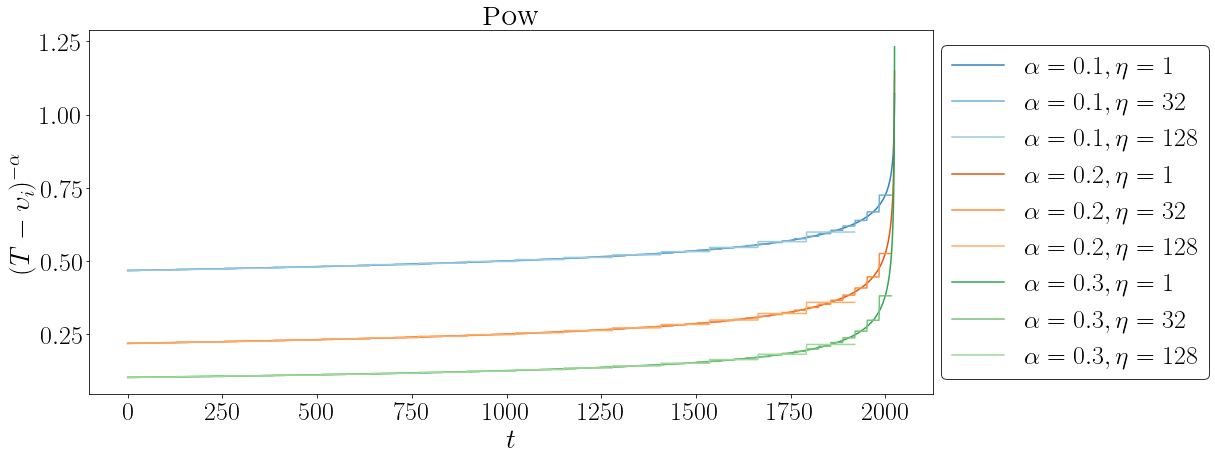

In [143]:
plt.figure(figsize=(17,6.5))
add = 0
for k in range(alpha.shape[0]):
    for j in range(batch_size.shape[0]):
        batch_no = int(obs_total//batch_size[j])
        step = 1
        mean_t = 0
        batch_weights = []
        for i in range(batch_no):
            mean_t = np.mean(np.arange(step,step+batch_size[j]+1)) # mean period of batch
            batch_weights.append(1/(obs_total-mean_t+1)**alpha[k]) # power law batch weight
            step += batch_size[j]
        plt.plot(np.repeat(batch_weights,batch_size[j]),label=r'$\alpha=%s, \eta=%s$' % (alpha[k],batch_size[j]), color=cmap(j+add), linestyle='-')
    add += 4
plt.xlabel(r'$t$')
plt.ylabel(r'$(T-\upsilon_i)^{-\alpha}$')
plt.title(r'\textsc{Pow}')
plt.legend(loc=(1.01, 0.04),edgecolor ='black')
plt.tight_layout()
plt.savefig(path+'POWlossweights.pdf', bbox_inches='tight')
plt.show()

Rayleigh weights:

In [144]:
batch_size = np.array([1,32,128])
alpha = np.array([1*10**(-6), 2*10**(-6), 1*10**(-5)])

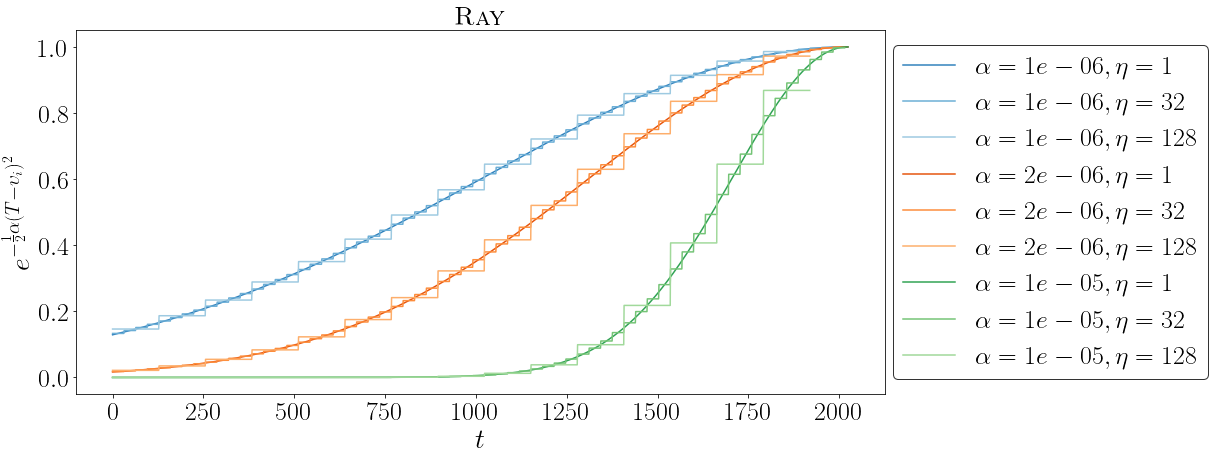

In [145]:
plt.figure(figsize=(17,6.5))
#plt.figure(constrained_layout=True)
add = 0
for k in range(alpha.shape[0]):
    for j in range(batch_size.shape[0]):
        batch_no = int(obs_total//batch_size[j])
        step = 1
        mean_t = 0
        batch_weights = []
        for i in range(batch_no):
            mean_t = np.mean(np.arange(step,step+batch_size[j]+1)) # mean period of batch
            batch_weights.append(np.exp(-(1/2)*alpha[k]*(obs_total-mean_t)**2)) # power law batch weight
            step += batch_size[j]
        plt.plot(np.repeat(batch_weights,batch_size[j]),label=r'$\alpha=%s, \eta=%s$' % (alpha[k],batch_size[j]), color=cmap(j+add), linestyle='-')
    add += 4
plt.xlabel(r'$t$')
plt.ylabel(r'$e^{-\frac{1}{2}\alpha(T-\upsilon_i)^2}$')
plt.title(r'\textsc{Ray}')
plt.legend(loc=(1.01, 0.04),edgecolor ='black')
plt.tight_layout()
plt.savefig(path+'RAYlossweights.pdf', bbox_inches='tight')
plt.show()